#       CEFET-RJ - UNED Nova Iguaçu
##   Dep. Engenharia de Controle e Automação 
## Disciplina: Processamento Digital de Imagens
Professor: Gabriel Matos Araujo<br>
Exercicio 1 - Aula 5 (Combinando Imagens) <br>

### Exercicio:
Em aula vimos um método simples de remoção de plano de fundo.
Experimente variar o valor de Alpha na formula:

Background[t] = Alpha*Background[t-1] + (1 - Alpha)NewFrame[t]

Elabore um pequeno paragrafo sobre os efeitos do valor de alpha.
"""

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from os.path import abspath
from ipywidgets import interact, fixed, interact_manual
%matplotlib inline

In [2]:
vrObj = cv2.VideoCapture(abspath('surveillance.mpg'))
vrObj

<VideoCapture 0x7f4d14e843d0>

In [3]:
fourcc = cv2.VideoWriter_fourcc(*'XVID')
vwObj = cv2.VideoWriter('Background_Subtraction.avi',fourcc, 30.0, (640,480))
vwObj

<VideoWriter 0x7f4ce88f7510>

In [4]:
alpha = 0.95
theta = 0.1
frames = int(vrObj.get(cv2.CAP_PROP_FRAME_COUNT)) - 1
ret, background = vrObj.read()
frames

396

In [5]:
background = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)
videoImages = [background]

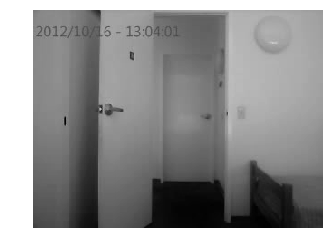

In [6]:
plt.figure(1)
plt.axis("off")
plt.imshow(cv2.cvtColor(background.copy(), cv2.COLOR_BGR2RGB))

In [7]:
images = []
while vrObj.isOpened():
    ret, currImg0 = vrObj.read()
    if not ret:
        break
    currImg = cv2.cvtColor(currImg0, cv2.COLOR_BGR2GRAY)
    videoImages.append(currImg)
    background = (alpha * background  + (1 - alpha)* currImg).astype(np.uint8)
    diffImg = abs(currImg - background)
    threshImg = (diffImg > theta).astype(np.uint8) * 255
    vwObj.write(currImg)
    images.append([currImg.copy(), background.copy(), diffImg.copy(), threshImg.copy()])

titles = ['New frame', 'Background frame', 'Difference image', 'Thresholded difference image']
def plot_imgs(titles, images, frame=len(images)-1):
    plots=images[frame]
    figs, axs = plt.subplots(2, 2)
    for ax, plot, title in zip(axs.reshape(-1), plots, titles):
        ax.imshow(cv2.cvtColor(plot.copy(), cv2.COLOR_BGR2RGB),vmax=255,vmin=0)
        ax.set_title(title)
        ax.axis('off')
vwObj.release()
vrObj.release()
interact(plot_imgs, frame=(0, len(images)-1, 1), titles=fixed(titles), images=fixed(images))

interactive(children=(IntSlider(value=395, description='frame', max=395), Output()), _dom_classes=('widget-int…

<function __main__.plot_imgs(titles, images, frame=395)>

In [12]:
def plot_var_alpha(alpha=0.95, theta=0.1, videoImages=None):
    images = []
    background=videoImages[0]
    for currImg in videoImages:
        background = (alpha * background  + (1 - alpha)* currImg).astype(np.uint8)
        diffImg = abs(currImg - background)
        threshImg = (diffImg > theta).astype(np.uint8) * 255
        vwObj.write(currImg)
        images.append([currImg.copy(), background.copy(), diffImg.copy(), threshImg.copy()])

    titles = ['New frame', 'Background frame', 'Difference image', 'Thresholded difference image']
    def plot_imgs(titles, images, frame=len(images)-1):
        plots=images[frame]
        figs, axs = plt.subplots(2, 2)
        for ax, plot, title in zip(axs.reshape(-1), plots, titles):
            ax.imshow(cv2.cvtColor(plot.copy(), cv2.COLOR_BGR2RGB),vmax=255,vmin=0)
            ax.set_title(title)
            ax.axis('off')
    return interact(plot_imgs, frame=(0, len(images)-1, 1), titles=fixed(titles), images=fixed(images))
interact_manual(plot_var_alpha, alpha=(0,1,0.01), theta=(0,1,0.1), videoImages=fixed(videoImages))

interactive(children=(FloatSlider(value=0.95, description='alpha', max=1.0, step=0.01), FloatSlider(value=0.1,…

<function __main__.plot_var_alpha(alpha=0.95, theta=0.1, videoImages=None)>

## Conclusion
When we have a high alpha, we see that any difference between the background frame and the new frame creates a high difference value in the difference image, but when we have a low alpha we see only the edges of the differences in the difference image.